In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.cross_validation import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score
import utils

/home/libfun/vrt/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
train = pd.read_csv('data_train.csv', index_col='Unnamed: 0')

In [3]:
test = pd.read_csv('data_eval.csv', index_col='Unnamed: 0')

Ghost = 169626  
Electron = 5610  
Muon = 29839  
Pion = 774220  
Kaon = 138261  
Proton = 81951

In [4]:
old_features = {'Electron': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                             'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                             'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                             'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                             'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                             'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL', 'MuonIsMuon',
                             'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon', 'EcalPIDe',
                             'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Ghost': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                          'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                          'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                          'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                          'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                          'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL', 'MuonIsMuon',
                          'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon', 'EcalPIDe', 
                          'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Kaon': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                         'RichAboveKaThres', 'RichAbovePrThres', 'RichDLLe', 'RichDLLmu',
                         'RichDLLk', 'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL',
                         'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                         'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe',
                         'InAccBrem', 'BremPIDe'],
                'Muon': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                         'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                         'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL', 'MuonNShared',
                         'InAccEcal', 'EcalPIDe', 'EcalPIDmu', 'InAccHcal', 'HcalPIDe',
                         'HcalPIDmu', 'InAccPrs', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Pion': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                         'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                         'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL',
                         'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                         'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe',
                         'InAccBrem', 'BremPIDe'],
                'Proton': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                           'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                           'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                           'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                           'RichAboveKaThres', 'RichAbovePrThres', 'RichDLLe', 'RichDLLmu',
                           'RichDLLk', 'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL',
                           'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                           'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'CaloPrsE',
                           'PrsPIDe', 'InAccBrem', 'BremPIDe']}

In [5]:
pid_dict = {"Ghost": 0,
            "Electron": 11,
            "Muon": 13,
            "Pion": 211,
            "Kaon": 321,
            "Proton": 2212
}

In [6]:
target = np.abs(train.MCParticleType.values)
mask = np.array([i not in [0, 11, 13, 211, 321, 2212] for i in np.abs(train.MCParticleType.values)])
target[mask] = np.zeros(mask.sum())

y_test = np.abs(test.MCParticleType.values)
mask = np.array([i not in [0, 11, 13, 211, 321, 2212] for i in np.abs(test.MCParticleType.values)])
y_test[mask] = np.zeros(mask.sum())

In [7]:
target = np.abs(train.MCParticleType.values)

target_m = np.zeros(target.shape)
target_m[target == pid_dict['Ghost']] = 0
target_m[target == pid_dict['Muon']] = 1
target_m[target == pid_dict['Pion']] = 2
target_m[target == pid_dict['Kaon']] = 3
target_m[target == pid_dict['Proton']] = 4
target_m[target == pid_dict['Electron']] = 5

y_train = target_m.copy()

#y_test = np.abs(test.MCParticleType.values)

target_m = np.zeros(y_test.shape)
target_m[y_test == pid_dict['Ghost']] = 0
target_m[y_test == pid_dict['Muon']] = 1
target_m[y_test == pid_dict['Pion']] = 2
target_m[y_test == pid_dict['Kaon']] = 3
target_m[y_test == pid_dict['Proton']] = 4
target_m[y_test == pid_dict['Electron']] = 5

y_test = target_m.copy()

In [8]:
X_train, X_val, y_trai, y_val = train_test_split(train, y_train, test_size=.1, 
                                                 random_state=42, stratify=y_train)

In [9]:
feat_uni = set(old_features['Electron'])
for v in old_features.values():
    k = set(v)
    feat_uni = feat_uni.union(k)
    
feat_uni = list(feat_uni)

In [10]:
import lasagne
from lasagne.layers import InputLayer, DenseLayer, DropoutLayer
from lasagne.utils import floatX
import theano

Using gpu device 0: GeForce GTX 980 Ti (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)


In [11]:
import theano.tensor as T

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [14]:
import time

In [15]:
from sklearn.metrics import log_loss
import sys

In [16]:
from sklearn.preprocessing import Imputer

to_log = ['MuonNShared',  'TrackPt', 'TrackP', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
          'TrackFitVeloNDoF', 'TrackFitTChi2']

to_log_negative = ['MuonMuLL', 'RichDLLbt', 'RichDLLe', 
                   'RichDLLp', 'RichDLLmu', 'RichDLLk']

# CaloChargedSpd - 1 or -999
# CombDLLpi, RichDLLpi  0 or -999

def log1p_negative(array):
    negative = array < 0
    array = np.log1p(np.abs(array))
    array[negative] *= -1
    return array

def preprocess_data(X):
    #X.loc[:, 'CaloChargedSpd'].replace(-999, 0, inplace=1)
    X.loc[:, 'RichDLLpi'].replace(-999, 1, inplace=1)
    
    X[X == -999] = np.nan

    #imp = Imputer()
    #X = imp.fit_transform(X)
    #X = pd.DataFrame(data=X, columns=X_columns)

    for col in to_log:
        X[col] = np.log1p(X[col])
    for col in to_log_negative:
        X[col] = log1p_negative(X[col])
    return X

train = preprocess_data(train)
test = preprocess_data(test)

In [17]:
ft = feat_uni
mn = train[ft].mean().copy()
train = train[ft].fillna(mn)
test = test[ft].fillna(mn)

In [18]:
#X_train_norm = train[feat_uni].applymap(lambda x: 0 if x == -999 else x)
#X_test_norm = test[feat_uni].applymap(lambda x: 0 if x == -999 else x)

sc = StandardScaler()
X_train_sc = sc.fit_transform(train[ft].values)
X_test_sc = sc.transform(test[ft].values)

ndict = {'Ghost': 0, 'Muon': 1, 'Pion': 2, 'Kaon': 3, 'Proton': 4, 'Electron': 5}

train_w = np.ones(y_train.shape[0])
for p in ndict.keys():
    pw = y_train.shape[0]/(y_train == ndict[p]).sum()
    train_w[y_train == ndict[p]] *= pw
    
test_w = np.ones(y_test.shape[0])
for p in ndict.keys():
    pw = y_test.shape[0]/(y_test == ndict[p]).sum()
    test_w[y_test == ndict[p]] *= pw

In [19]:
input_var = T.tensor3('inputs')
target_var = T.ivector('targets')
weight_var = T.vector('weights')

net = {}
net['input'] = InputLayer((None, 38, 1),input_var=input_var)
net['fc1'] = DenseLayer(net['input'], num_units=128,
                        nonlinearity = lasagne.nonlinearities.rectify,
                        W = lasagne.init.GlorotUniform(gain = 'relu'))
net['drop1'] = DropoutLayer(net['fc1'], p=0.5)
net['fc2'] = DenseLayer(net['drop1'], num_units=128,
                        nonlinearity = lasagne.nonlinearities.rectify,
                        W = lasagne.init.GlorotUniform(gain = 'relu'))
net['drop2'] = DropoutLayer(net['fc2'], p=0.5)
net['fc3'] = DenseLayer(net['drop2'], num_units=6, nonlinearity=lasagne.nonlinearities.softmax)
output_layer = net['fc3']



prediction = lasagne.layers.get_output(output_layer)
loss = lasagne.objectives.categorical_crossentropy(prediction, target_var)
loss = loss.dot(weight_var) / weight_var.sum()

params = lasagne.layers.get_all_params(output_layer, trainable=True)
updates = lasagne.updates.adam(loss, params)

test_prediction = lasagne.layers.get_output(output_layer, deterministic=True)
test_loss = lasagne.objectives.categorical_crossentropy(test_prediction,
                                                        target_var)
test_loss = test_loss.dot(weight_var)  / weight_var.sum()
test_acc = T.mean(T.eq(T.argmax(test_prediction, axis=1), target_var),
                  dtype=theano.config.floatX)

train_fn = theano.function([input_var, weight_var, target_var], loss, updates=updates)

val_fn = theano.function([input_var, weight_var, target_var], [test_loss, test_acc])

test_fn = theano.function([input_var], test_prediction)

In [20]:
X_train_sc.shape

(1200000, 38)

In [21]:
# Finally, launch the training loop.
print("Starting training...")
# We iterate over epochs:
for epoch in range(1000):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    train_batches = 0
    start_time = time.time()
    #for batch in iterate_minibatches(X_train_sc.astype('float32').reshape(-1, 38, 1), 
    #                                 y_train, 1200000, shuffle=True):
    #    inputs, targets = batch
    train_err += train_fn(X_train_sc.astype('float32').reshape(-1, 38, 1), 
                          train_w.astype('float32'), y_train.astype('int32'))
    train_batches += 1

    # Then we print the results for this epoch:
    sys.stdout.write("\rEpoch {} of {} took {:.3f}s \t train loss: {:.6f}".format(
        epoch + 1, 1000, time.time() - start_time, train_err / train_batches))

Starting training...
Epoch 1000 of 1000 took 0.682s 	 train loss: 0.686366

In [22]:
preds = test_fn(X_test_sc.astype('float32').reshape(-1, 38, 1))

In [23]:
preds.shape

(1000000, 6)

In [24]:
pd.DataFrame(data=preds, columns=['Ghost', 'Muon', 'Pion', 
                                  'Kaon', 'Proton', 'Electron']).to_csv('preds_las.csv')

In [8]:
preds = pd.read_csv('preds_las.csv', index_col=0).values

In [9]:
label_list = ['Ghost', 'Muon', 'Pion', 'Kaon', 'Proton', 'Electron']

In [10]:
from sklearn.metrics import roc_curve

def labels_transform(labels):
    """
    Transform labels from shape = [n_samples] to shape = [n_samples, n_classes]
    :param labels: array
    :return: ndarray, transformed labels
    """
    classes = np.unique(labels)

    new_labels = np.zeros((len(labels), len(classes)))
    for cl in classes:
        new_labels[:, cl] = (labels == cl) * 1.

    return new_labels

def get_roc_curves(labels, probas, curve_labels, save_path=None, show=True):
    """
    Creates roc curve for each class vs rest.
    :param labels: array, shape = [n_samples], labels for the each class 0, 1, ..., n_classes - 1.
    :param probas: ndarray, shape = [n_samples, n_classes], predicted probabilities.
    :param curve_labels: array of strings , shape = [n_classes], labels of the curves.
    :param save_path: string, path to a directory where the figure will saved. 
     If None the figure will not be saved.
    :param show: boolean, if true the figure will be displayed.
    """
    labels = labels_transform(labels)
    weights = np.zeros(len(labels))

    for num in range(labels.shape[1]):
        weights += 0.1 * (labels[:, num] == 1) * len(labels) / ((labels[:, num] == 1).sum())

    plt.figure(figsize=(10,7))
    for num in range(probas.shape[1]):

        roc_auc = roc_auc_score(labels[:, num], probas[:, num], sample_weight=weights)
        fpr, tpr, _ = roc_curve(labels[:, num], probas[:, num], sample_weight=weights)

        plt.plot(tpr, 1.-fpr, label=curve_labels[num] + ', %.5f' % roc_auc, linewidth=2)

    plt.title("ROC Curves ProbNN", size=15)
    plt.xlabel("Signal efficiency", size=15)
    plt.ylabel("Background rejection", size=15)
    plt.legend(loc='best',prop={'size':15}, frameon=True, shadow=True, framealpha=1.)
    plt.xticks(np.arange(0, 1.01, 0.1), size=15)
    plt.yticks(np.arange(0, 1.01, 0.1), size=15)
    
    if save_path != None:
        plt.savefig(save_path + "/overall_roc_auc.png")

    if show == True:
        plt.show()

    plt.clf()
    plt.close()

In [11]:
sns.set(style='whitegrid')

/home/libfun/vrt/lib/python3.4/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


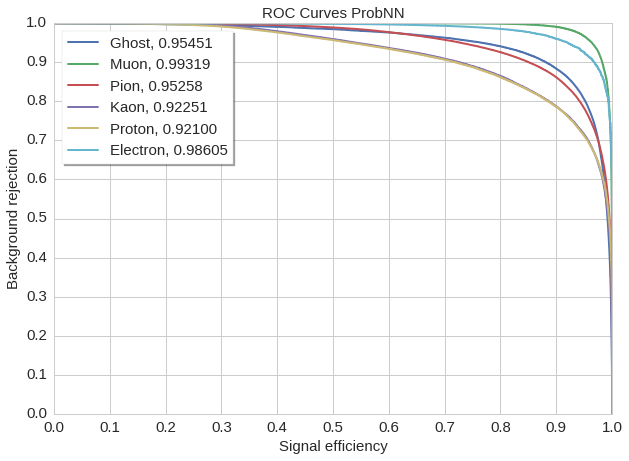

In [12]:
get_roc_curves(y_test, preds, label_list)

/home/libfun/pid/utils.py:97: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  new_labels[:, cl] = (labels == cl) * 1.


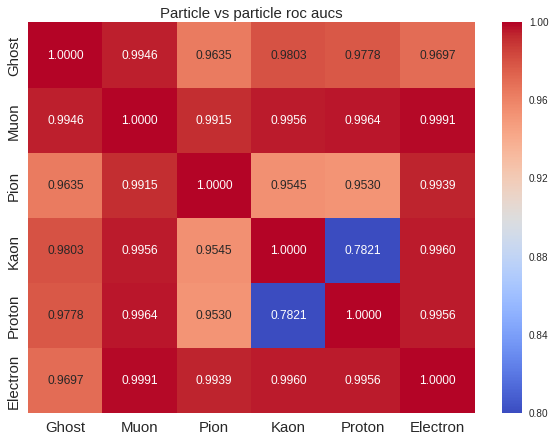

In [13]:
mat = utils.get_roc_auc_matrix(y_test, preds, label_list)

In [14]:
def get_roc_auc_matrix(labels, probas, axis_labels, save_path=None, show=True):
    """
    Calculate class vs class roc aucs matrix.
    :param labels: array, shape = [n_samples], labels for the each class 0, 1, ..., n_classes - 1.
    :param probas: ndarray, shape = [n_samples, n_classes], predicted probabilities.
    :param axis_labels: array of strings , shape = [n_classes], labels of the curves.
    :param save_path: string, path to a directory where the figure will saved.
     If None the figure will not be saved.
    :param show: boolean, if true the figure will be displayed.
    :return: pandas.DataFrame roc_auc_matrix
    """
    labels = labels_transform(labels)

    # Calculate roc_auc_matrices
    roc_auc_matrices = np.ones((probas.shape[1],probas.shape[1]))

    for first in range(probas.shape[1]):
        for second in range(probas.shape[1]):
            if first == second:
                continue
            weights = ((labels[:, first] != 0) + (labels[:, second] != 0)) * 1.
            roc_auc = roc_auc_score(labels[:, first], probas[:, first]/probas[:, second], sample_weight=weights)
            roc_auc_matrices[first, second] = roc_auc


    # Save roc_auc_matrices
    matrix = pd.DataFrame(columns=axis_labels, index=axis_labels)

    for num in range(len(axis_labels)):
        matrix[axis_labels[num]] = roc_auc_matrices[num, :]

    if save_path != None:
        matrix.to_csv(save_path + "/class_vs_class_roc_auc_matrix.csv")

    # Plot roc_auc_matrices
    #inline_rc = dict(mpl.rcParams)
    #import seaborn as sns
    plt.figure(figsize=(10,7))
    sns.set()
    ax = plt.axes()
    sns.heatmap(matrix, vmin=mat.min().min(), vmax=mat[mat != 1.].max().max(), 
                annot=True, fmt='.4f', ax=ax)
    plt.title('Particle vs particle roc aucs lasagne mlp', size=15)
    plt.xticks(size=15)
    plt.yticks(size=15)

    if save_path != None:
        plt.savefig(save_path + "/class_vs_class_roc_auc_matrix.png")

    if show == True:
        plt.show()

    plt.clf()
    plt.close()

    #mpl.rcParams.update(mpl.rcParamsDefault)
    #mpl.rcParams.update(inline_rc)

    return matrix

/home/libfun/vrt/lib/python3.4/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


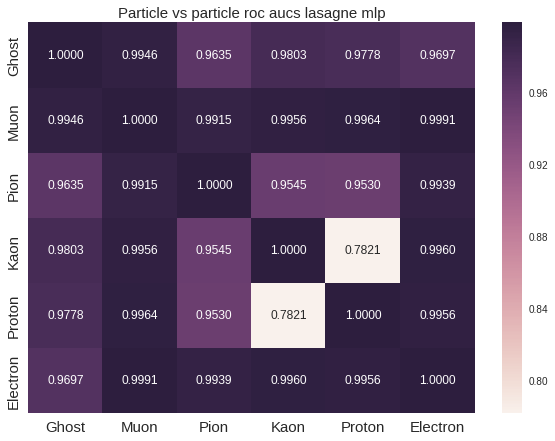

In [15]:
mat = get_roc_auc_matrix(target_m, preds, label_list)

In [16]:
mat2 = pd.read_csv('./baseline_mat.csv', index_col='Unnamed: 0')

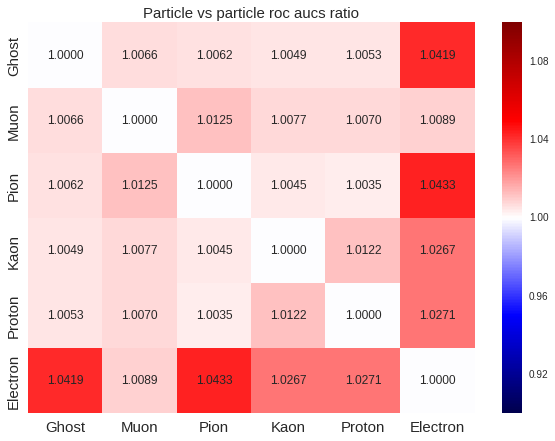

,Ghost,Muon,Pion,Kaon,Proton,Electron
Ghost,1.000000,1.006640,1.006170,1.004934,1.005288,1.041943
Muon,1.006639,1.000000,1.012486,1.007735,1.007044,1.008942
Pion,1.006170,1.012486,1.000000,1.004487,1.003504,1.043257
Kaon,1.004934,1.007735,1.004487,1.000000,1.012198,1.026665
Proton,1.005288,1.007044,1.003504,1.012198,1.000000,1.027072
Electron,1.041943,1.008942,1.043257,1.026665,1.027072,1.000000


In [17]:
utils.get_roc_auc_ratio_matrix(mat, mat2)

In [18]:
from rep.utils import get_efficiencies
from rep.plotting import ErrorPlot

def flatness_p_figure(label, proba, track_p, track_name, particle_name, save_path=None, show=False):
    thresholds = np.percentile(proba[label], 100 - np.array([20, 50, 80]))

    eff = get_efficiencies(proba[label],
                           1/track_p[label],
                           bins_number=30,
                           errors=True,
                           ignored_sideband=.05,
                           thresholds=thresholds)

    
    for i in thresholds:
        eff[i] = (eff[i][0], 100. * eff[i][1], 100. * eff[i][2], eff[i][3])
    
    ax = plt.subplot(111)
    
    for i in thresholds:
        ax.errorbar(eff[i][0], eff[i][1], yerr=eff[i][2], xerr=eff[i][3], 
                     elinewidth=1, capsize=2, fmt='.', capthick=1)

    labels = ['Eff = 20 %',
              'Eff = 50 %',
              'Eff = 80 %']
    plt.legend(labels, loc='best',prop={'size':12}, frameon=True, shadow=True, framealpha=1., ncol=1)
    plt.xlabel('1 / '+ track_name + ' ' + particle_name + ' Momentum', size=15)
    plt.ylabel('Efficiency / %', size=15)
    plt.ylim = (0, 100)
    ax.set_ylim([0, 100])
    plt.title('Flatness TrackP' + track_name + ' ' + particle_name, size=15)
    plt.show()
    
def flatness_pt_figure(label, proba, track_pt, track_name, particle_name, save_path=None, show=False):
    thresholds = np.percentile(proba[label], 100 - np.array([20, 50, 80]))

    eff = get_efficiencies(proba[label],
                           1/track_pt[label],
                           bins_number=30,
                           errors=True,
                           ignored_sideband=.05,
                           thresholds=thresholds)

    for i in thresholds:
        eff[i] = (eff[i][0], 100. * eff[i][1], 100. * eff[i][2], eff[i][3])

    ax = plt.subplot(111)
    
    for i in thresholds:
        ax.errorbar(eff[i][0], eff[i][1], yerr=eff[i][2], xerr=eff[i][3], 
                     elinewidth=1, capsize=2, fmt='.', capthick=1)

    labels = ['Eff = 20 %',
              'Eff = 50 %',
              'Eff = 80 %']
    plt.legend(labels, loc='best',prop={'size':12}, frameon=True, shadow=True, framealpha=1., ncol=1)
    plt.xlabel('1 / '+ track_name + ' ' + particle_name + ' Transverse Momentum', size=15)
    plt.ylabel('Efficiency / %', size=15)
    plt.ylim = (0, 100)
    ax.set_ylim([0, 100])
    plt.title('Flatness TrackPt' + track_name + ' ' + particle_name, size=15)
    plt.show()

In [19]:
preds_dict = {'Electron': preds[:, 5],
              'Proton': preds[:, 4],
              'Kaon': preds[:, 3],
              'Muon': preds[:, 1],
              'Pion': preds[:, 2],
              'Ghost': preds[:, 0]}

In [20]:
test = pd.read_csv('data_eval.csv', index_col='Unnamed: 0')

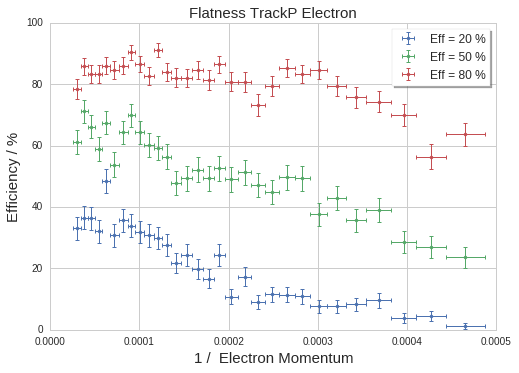

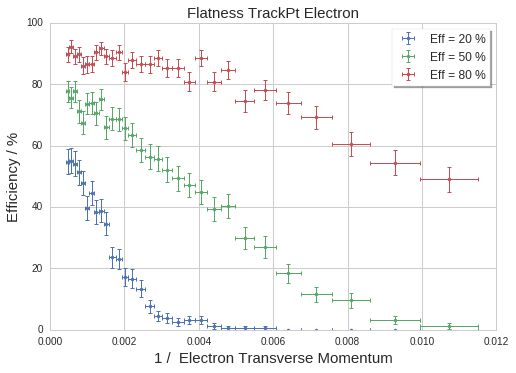

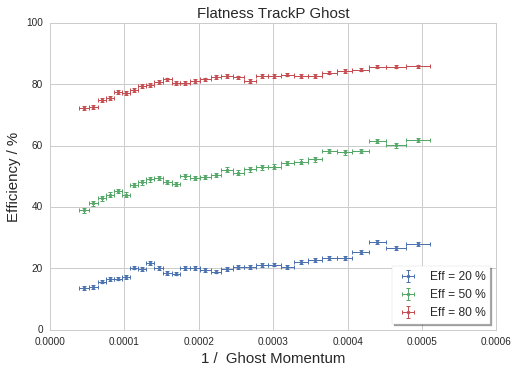

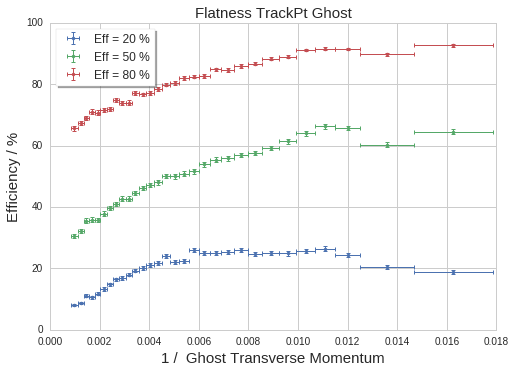

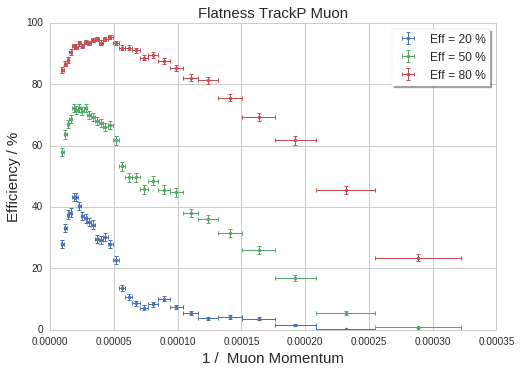

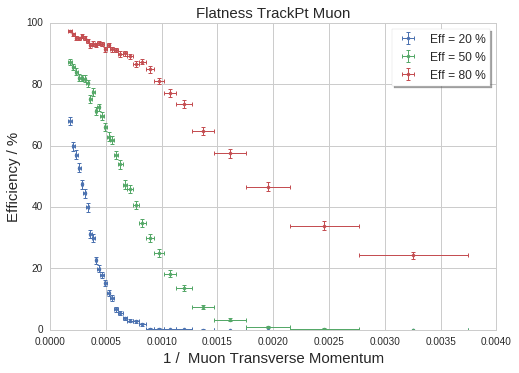

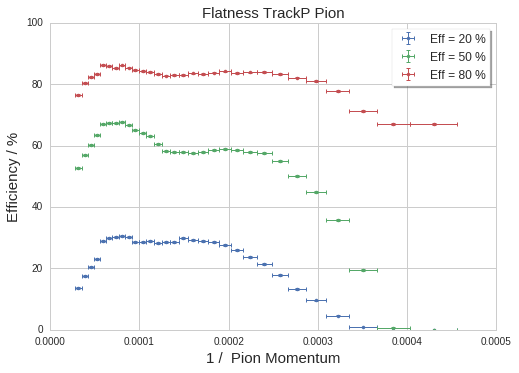

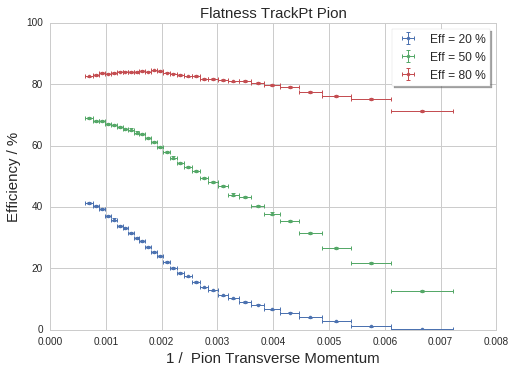

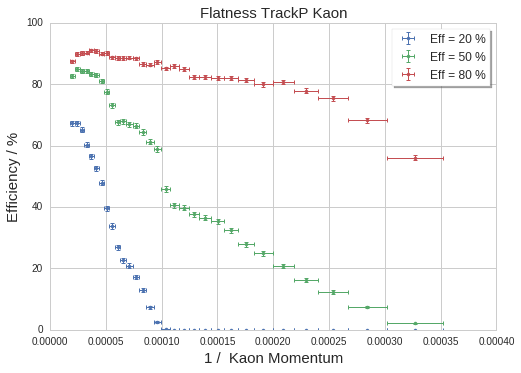

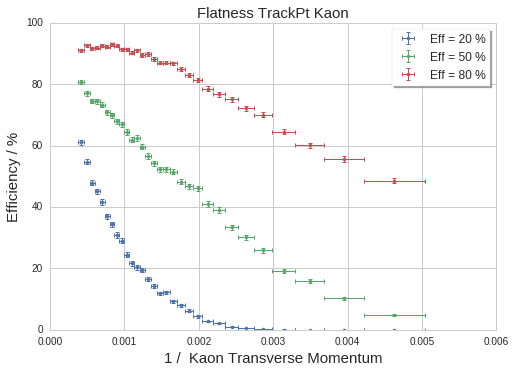

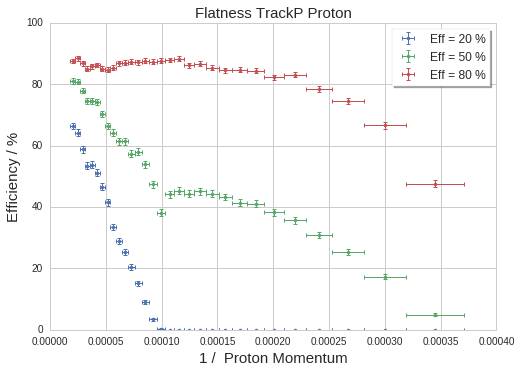

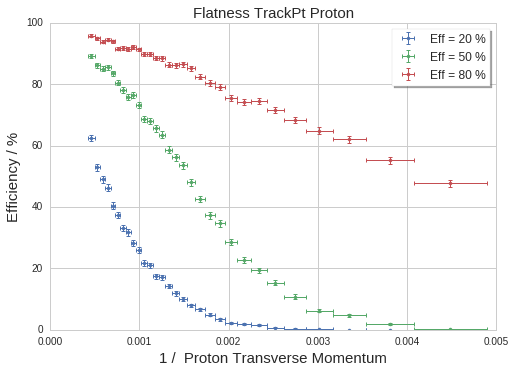

In [21]:
sns.set(style='whitegrid')
ndc = {'Ghost': 0, 'Muon': 1, 'Pion':2, 'Kaon': 3, 'Proton': 4, 'Electron': 5}
for i in preds_dict:
    flatness_p_figure(target_m == ndc[i], preds_dict[i], test.TrackP.values, '', i)
    flatness_pt_figure(target_m == ndc[i], preds_dict[i], test.TrackPt.values, '', i)

In [39]:
from utils_new import get_flatness_table

In [40]:
fl = get_flatness_table(test, y_test, preds, label_list)
fl

/home/libfun/pid/utils_new.py:97: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  new_labels[:, cl] = (labels == cl) * 1.


,TrackP,TrackPt,P_Conf_level,Pt_Conf_level
Ghost,0.003383,0.009965,0.000870,0.000864
Muon,0.039147,0.060973,0.000904,0.000900
Pion,0.019210,0.017383,0.000849,0.000850
Kaon,0.051176,0.037591,0.000883,0.000875
Proton,0.042668,0.047676,0.000899,0.000876
Electron,0.010041,0.035546,0.000982,0.001000


In [41]:
from itertools import combinations
from sklearn.metrics import log_loss

auc_sum = 0.0
for ind1, ind2 in combinations(range(6), 2):
    auc_sum += mat.iloc[ind1, ind2]
print('Avg. pairwise ROC AUC:', auc_sum / 15)

print('Categorical cross-entropy:', log_loss(target_m, preds))

print('Mean flatness:', fl[['TrackP', 'TrackPt']].values.mean())

Avg. pairwise ROC AUC: 0.969572546004
Categorical cross-entropy: 0.705325173993
Mean flatness: 0.031229951739
